In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import MSAtools as msa


ModuleNotFoundError: No module named 'MSAtools'

In [11]:
#Nonner

nOxy = 8.0
msa.nOxy = 8.0
idxOxy = 0
msa.idxOxy = 0
#msa.idxNa = 2
conc_M = np.array([1e-200, (152.0e-3+2.0e-6), 150.0e-3, 1.0e-6])  # [M] order is  O Cl, Na, Mg, Ca (bath) 
zs = np.array([-0.5, -1.0, 1.0, 2.00]) #input charges here
Ns = np.array([8.0, 1., 1., 1.]) # Filter
V_i = 0.375 # radius from RDF + rOxy, nm^3
#V_i = 0.1131 #3.0 angstrom radius
#FF RADII (Li/Merz)#
sigmas = np.array([0.278, 0.362, 0.204, 0.200])
#epsilonFilter = 63.5

In [12]:
## most recent as of May 16 2016

nOxy = 6.5
msa.nOxy = 6.5
idxOxy = 0
msa.idxOxy = 0
conc_M = np.array([1e-200, (152.0e-3+2.0e-6), 150.0e-3, 1.0e-6, 1.0e-3])  # [M] order is  O Cl, Na, Mg, Ca (bath) 
zs = np.array([-0.7469, -1.0, 1.0, 1.77,1.69]) #input charges here
Ns = np.array([7.0, 1., 1., 1.,1.]) # Filter; no need to change this
V_i = 0.613 # FILTER VOLUME; radius from RDF + rOxy, nm^3
#V_i = 0.1131 #3.0 angstrom radius
sigmas = np.array([0.354, 0.454, 0.352, 0.272,0.236]) # IONIC Radii based on Force Fields (Li/Merz)#
#epsilonFilter = 63.5

In [13]:
nIons = 5
CaCl2 = 1e-10
idxCa = 10
nConcs = 10
#calc2s = np.array([-6])
cacl2s = 10**np.linspace(-10,-1,nConcs)
#print CaCl2s
filter_dielectric = 25.0 #input filter dielectric here!
rhoFilters=[] 
donnanPotentials = np.zeros( nConcs )
mufilters=[]
mu_ESs=[]
mu_HSs=[]
muiexsPrev = np.zeros(nIons)
psiPrev = 0.
muiexsPrev = 0
alpha = 0.0010
for i, cacl2i in enumerate(cacl2s):
  #rint "Here: ",rhoFilteri
  conc_M = np.array([1e-200, (150.0e-3 + 2*cacl2i+2.0e-3), 100.0e-3, cacl2i,1.0e-3]) # [M] order is  O Cl, Na, Ca (bath) 
  mufilteri,donnanPotentiali,mu_ESi,mu_HSi,rhoFilteri = msa.SolveMSAEquations(filter_dielectric,conc_M,zs,Ns,V_i,sigmas, \
                                                     psiPrev=psiPrev,muiexsPrev=muiexsPrev,alpha=alpha)#, verbose=True)
    
  mufilters.append(mufilteri)
  mufilters[i] = mufilteri
  mu_ESs.append(mu_ESi)
  mu_ESs[i] = mu_ESi
  mu_HSs.append(mu_HSi)
  mu_HSs[i] = mu_HSi
  muiexsPrev=mufilteri 
  donnanPotentials[i] = donnanPotentiali
  psiPrev = donnanPotentiali  
  rhoFilters.append(rhoFilteri)
  rhoFilters[i] = rhoFilteri  
# convert list into array 
rhoFilters = np.asarray(rhoFilters)
mufilters = np.asarray(mufilters)
mu_HSs = np.asarray(mu_HSs)
mu_ESs = np.asarray(mu_ESs)

MAIN
MAIN


MSAtools.py:129: RuntimeWarning: invalid value encountered in log
  HSmu+= xi_0*sigmas*sigmas*sigmas*(1.+HSphifilter) - np.log(delta)


UnboundLocalError: local variable 'muiexs' referenced before assignment

In [1]:
#epsilonFilter = 70.0
#alpha = 1e-3

## basically my unit test
#chemPotential,donnanPotential,muES,muHS,rhoFilter = msa.SolveMSAEquations(epsilonFilter,conc_M,zs,Ns,V_i,sigmas,alpha=alpha)

#print chemPotential
#print donnanPotential
#print muES
#print muHS
#print rhoFilter

In [16]:
idxO=0
idxCl=1
idxNa=2
idxCa=3
idxMg=4
font = {'weight' : 'bold','size'   : 12}

plt.plot(cacl2s,rhoFilters[0:1,idxCa]*1.6606,'b-',label="Ca ")
plt.plot(cacl2s,rhoFilters[0:1,idxNa]*1.6606,'-', color = 'darkgoldenrod', label="Na")
plt.plot(cacl2s,rhoFilters[0:1,idxCl]*1.6606,'g-',label="Cl ")
plt.plot(cacl2s,rhoFilters[0:1,idxMg]*1.6606,'m-',label="Mg ")
plt.title("Ion Density in Filter vs.\n Bath Concentration of Ca", **font)
plt.ylabel("Filter Density [M]", **font)
plt.xlabel("[Ca], M", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
#print rhoFilters[:,idxMg]
#plt.gcf().savefig("RHOS_Nonner.png", dpi=300)

TypeError: list indices must be integers, not tuple

In [12]:
#CD site
rho_MG_adj_CD = rhoFilters[:,idxMg]*1.6606*np.exp(-12.034) / (rhoFilters[:,idxMg]*1.6606*np.exp(-12.034)+rhoFilters[:,idxCa]*1.6606*np.exp(-1.864))
rho_CA_adj_CD = rhoFilters[:,idxCa]*1.6606*np.exp(-1.864) / (rhoFilters[:,idxMg]*1.6606*np.exp(-12.034)+rhoFilters[:,idxCa]*1.6606*np.exp(-1.864))




#plt.plot(cacl2s,rho_MG_adj)
#plt.plot(cacl2s,rho_CA_adj)
#plt.xscale("log")
#print rhoFilters[:,idxCa]

In [29]:
#you can save your output data here
np.savetxt("MSA_EF_rhos.txt",X = rhoFilters)
np.savetxt("MSA_EF_mus.txt", X = mufilters)

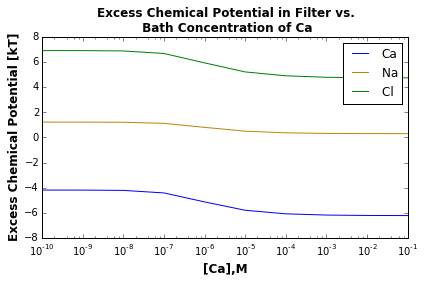

In [35]:
idxCl=1
idxO=0
idxCa=3
idxNa=2
idxMg=4
#plt.plot(cacl2s,(mufilters[:,idxCa]),'k--',label="Ca (adj) ")
plt.plot(cacl2s,(mufilters[:,idxCa]),'b-',label="Ca")
plt.plot(cacl2s,mufilters[:,idxNa],'-', color = 'darkgoldenrod', label="Na ")
plt.plot(cacl2s,mufilters[:,idxCl],'g-',label="Cl ")
#plt.plot(cacl2s,mufilters[:,idxO],'y-',label="O ")
#plt.plot(cacl2s,(mufilters[:,idxMg]+12.034),'m--',label="Mg (adj) ")
#plt.plot(cacl2s,(mufilters[:,idxMg]),'m-',label="Mg")
plt.title("Excess Chemical Potential in Filter vs.\n Bath Concentration of Ca", **font)
plt.ylabel("Excess Chemical Potential [kT]", **font)
plt.xlabel("[Ca],M", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
#plt.ylim(-12,6)
#plt.ylim(-15,30)
plt.tight_layout()
plt.gcf().savefig("MUS_Nonner.png", dpi=300)
#plt.gcf().savefig("/net/share/anku223/mdjobsbpv/MUS_150mMKCl_MG_MGvol_5O_limerz_eps175.png", dpi=300)
#plt.gcf().savefig("/net/share/anku223/mdjobsbpv/MUS_progress_AUG_mgsite.png",dpi=300)
#print mufilters[:,idxMg]+12.034
#print mufilters[:,idxCa]+1.864

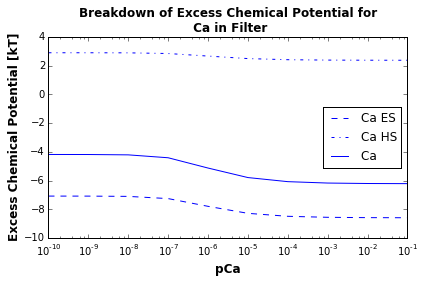

In [11]:
idxCa=3
plt.plot(cacl2s,mu_ESs[:,idxCa],'b--',label="Ca ES ")
plt.plot(cacl2s,mu_HSs[:,idxCa],'b-.',label="Ca HS")
plt.plot(cacl2s,mufilters[:,idxCa],'b-',label="Ca ")
plt.title("Breakdown of Excess Chemical Potential for\n Ca in Filter", **font)
plt.ylabel("Excess Chemical Potential [kT]", **font)
plt.xlabel("pCa", **font)
plt.xscale("log", **font)
plt.legend(loc="best")

plt.tight_layout()
plt.gcf().savefig("CA_Nonner.png",dpi=300)

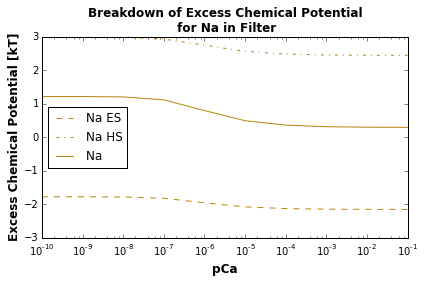

In [34]:
plt.plot(cacl2s,mu_ESs[:,idxNa],'--', color = 'darkgoldenrod', label="Na ES ")
plt.plot(cacl2s,mu_HSs[:,idxNa],'-.', color = 'darkgoldenrod',label="Na HS")
plt.plot(cacl2s,mufilters[:,idxNa],'-', color = 'darkgoldenrod',label="Na ")
#plt.plot(cacl2s,mufilters[:,idxNa],'--',color = 'goldenrod',label="Na ")
plt.title("Breakdown of Excess Chemical Potential\n for Na in Filter", **font)
plt.ylabel("Excess Chemical Potential [kT]", **font)
plt.xlabel("pCa", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
plt.gcf().savefig("Na_Nonner.png",dpi=300)
#plt.gcf().savefig("/net/share/anku223/mdjobsbpv/MSA/KMU_150mMKCl_mg_MGvol_7Orashinrad.png",dpi=300)

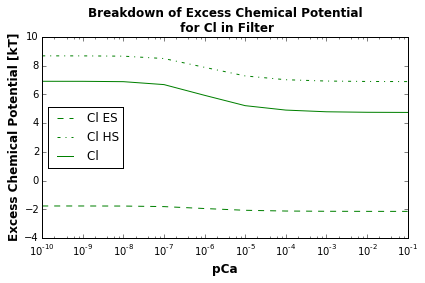

In [37]:
plt.plot(cacl2s,mu_ESs[:,idxCl],'g--',label="Cl ES ")
plt.plot(cacl2s,mu_HSs[:,idxCl],'g-.',label="Cl HS")
plt.plot(cacl2s,mufilters[:,idxCl],'g-',label="Cl ")
plt.title("Breakdown of Excess Chemical Potential\n for Cl in Filter", **font)
plt.ylabel("Excess Chemical Potential [kT]", **font)
plt.xlabel("pCa", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
plt.gcf().savefig("CL_Nonner.png",dpi=300)
#plt.gcf().savefig("/net/share/anku223/mdjobsbpv/MSA/CLMU_150mMKCl_mg_MGvol_7Orashinrad.png",dpi=300)

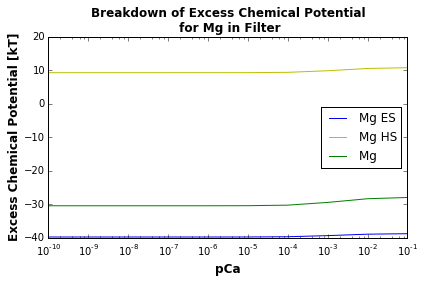

In [19]:
plt.plot(cacl2s,mu_ESs[:,idxMg],'b-',label="Mg ES ")
plt.plot(cacl2s,mu_HSs[:,idxMg],'y-',label="Mg HS")
plt.plot(cacl2s,mufilters[:,idxMg],'g-',label="Mg ")
plt.title("Breakdown of Excess Chemical Potential\n for Mg in Filter", **font)
plt.ylabel("Excess Chemical Potential [kT]", **font)
plt.xlabel("pCa", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
plt.gcf().savefig("MG_breakdown_150919_LIMERZ.png",dpi=300)
#plt.gcf().savefig("/net/share/anku223/mdjobsbpv/MSA/MGMU_150mMKCl_mg_MGvol_7Orashinrad.png",dpi=300)

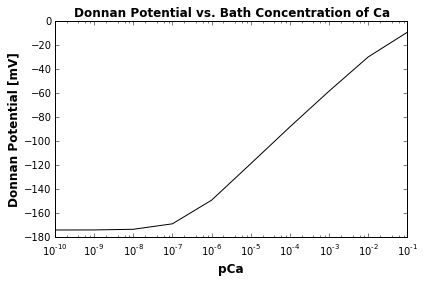

In [39]:
plt.plot(cacl2s,donnanPotentials, 'k-')
#plt.plot(cacl2s, nonnerpsi, 'b-.', label="Nonner Psi")
plt.title("Donnan Potential vs. Bath Concentration of Ca", **font) 
plt.ylabel("Donnan Potential [mV]", **font)
plt.xlabel("pCa", **font)
plt.xscale("log")
#plt.ylim(-200,50)
plt.tight_layout()
plt.gcf().savefig("PSI_nonner.png",dpi=300)

#plt.gcf().savefig("/net/share/anku223/mdjobsbpv/MSA/PSI_150mMKCl_mg_MGvol_7Orashinrad.png",dpi=300)

In [15]:
V_is = [3.0,2.9,2.8,2.7,2.6,2.5,2.4,2.3,2.2,2.1,2.0,1.9,1.8,1.7,1.6,1.5,1.4,1.3,1.2,1.1,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2]
eps_filters = [100.0,90.0,80.0,70.0,60.0,50.0,40.0,30.0]
nIons = 5
#nConcs = 3
#cacl2s = 10**np.linspace(-7,-5,nConcs)
cacl2s = np.array([1.0e-6])
rhoFilters=[] 
donnanPotentials = []
mufilters=[]
mu_ESs=[]
mu_HSs=[]
muiexsPrev = np.zeros(nIons)
psiPrev = 0.
muiexsPrev = 0.
alpha = 1e-3

mymufilters = np.zeros( [np.shape(V_is)[0], np.shape(eps_filters)[0]])

for i, V_i in enumerate(V_is):
    for j, epsilonFilter in enumerate(eps_filters):
        #for k, cacl2i in enumerate(cacl2s):
        conc_M = np.array([1e-200, (150.0e-3 + 2.0*cacl2s+2.0e-3), 150.0e-3, cacl2s,1.0e-3])  # [M] order is  O Cl, Na, Ca (bath) 
        mufilteri,donnanPotentiali,mu_ESi,mu_HSi,rhoFilteri = msa.SolveMSAEquations(epsilonFilter,conc_M,zs,Ns,V_i,sigmas, \
                                                                          psiPrev=psiPrev,muiexsPrev=muiexsPrev,alpha=1.0e-3)
        


        # save calcium to matrix
        idxCa = 3
        mymufilters[i,j] = mufilteri[idxCa]
        
        mufilters.append(mufilteri)
        mufilters[i] = mufilteri
        mu_ESs.append(mu_ESi)
        mu_ESs[i] = mu_ESi
        mu_HSs.append(mu_HSi)
        mu_HSs[i] = mu_HSi
        muiexsPrev=mufilteri 
        donnanPotentials.append(donnanPotentiali)
        donnanPotentials[i] = donnanPotentiali
        psiPrev = donnanPotentiali  
        rhoFilters.append(rhoFilteri)
        rhoFilters[i] = rhoFilteri  

            
# PKH 
#root = "150610_"
#fileNameVs = root+"_Vs.txt"
#np.savetxt(fileNameVs,V_is)
#fileNameEpss = root+"_Epss.txt"
#np.savetxt(fileNameEpss,eps_filters)

# todo 
donnanPotentials = np.asarray(donnanPotentials)
rhoFilters = np.asarray(rhoFilters)

#fileNamemuCa=root+"_muCa.txt"
#np.savetxt(fileNamemufilters,muCa)



mu_HSs = np.asarray(mu_HSs)
mu_ESs = np.asarray(mu_ESs)








MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN


KeyboardInterrupt: 

[[-2.37492689]
 [-5.72498553]
 [-6.07672958]
 [-5.99625238]
 [-5.80737874]
 [-5.60589019]]


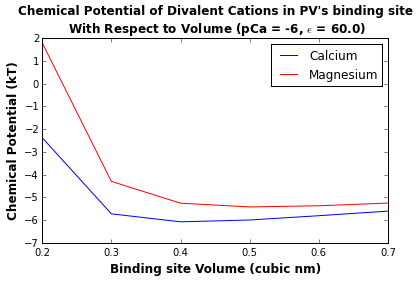

In [87]:
font = {'weight' : 'bold','size'   : 12}
print mymufiltersca
plt.plot(V_is,mymufiltersca, 'b', label = "Calcium")
plt.plot(V_is,mymufiltersmg, 'r', label = "Magnesium")
plt.legend(loc="best")
plt.title("Chemical Potential of Divalent Cations in PV's binding site\n With Respect to Volume (pCa = -6, $\epsilon$ = 60.0)", **font)
plt.ylabel("Chemical Potential (kT)", **font)
plt.xlabel("Binding site Volume (cubic nm)", **font)
plt.tight_layout()
plt.gcf().savefig("XSEDE_grantplot_ANK_eps_and_Vs.png", dpi = 300)

<matplotlib.colorbar.Colorbar instance at 0x7f5e1bc0ab90>

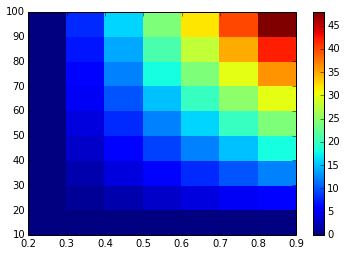

In [71]:

mymufilters = np.zeros( [np.shape(V_is)[0], np.shape(eps_filters)[0]])

for i, V_i in enumerate(V_is):
    for j, epsilonFilter in enumerate(eps_filters):
        for k, cacl2i in enumerate(cacl2s):
            conc_M = np.array([1e-200, (100.0e-3 + 2*cacl2i), 100.0e-3, cacl2i])  # [M] order is  O Cl, Na, Ca (bath) 
            #mufilteri,donnanPotentiali,mu_ESi,mu_HSi,rhoFilteri = msa.SolveMSAEquations(epsilonFilter,conc_M,zs,Ns,V_i,sigmas, \
            #                                                     psiPrev=psiPrev,muiexsPrev=muiexsPrev,alpha=1.0e-3)
        

            mufilteri = np.ones(4)*i*j
            # save calcium to matrix
            idxCa = 3
            mymufilters[i,j] = mufilteri[idxCa]

            
            
pcolormesh(np.array(V_is),np.array(eps_filters),mymufilters.T)            
plt.colorbar()

In [69]:
V_is = [0.2,0.3,0.4,0.5,0.6,0.7]
eps_filters = [10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0]
nIons = 5
nConcs = 3
cacl2s = 10**np.linspace(-7,-5,nConcs)

rhoFilters=[] 
donnanPotentials = []
mufilters=[]
mu_ESs=[]
mu_HSs=[]
muiexsPrev = np.zeros(nIons)
psiPrev = 0.
muiexsPrev = 0.
alpha = 1e-3

mymufilters = np.zeros( [np.shape(V_is)[0], np.shape(eps_filters)[0]])
myrhofilters = np.zeros( [np.shape(V_is)[0], np.shape(eps_filters)[0]])

for i, V_i in enumerate(V_is):
    for j, epsilonFilter in enumerate(eps_filters):
        #for k, cacl2i in enumerate(cacl2s):
        conc_M = np.array([1e-200, (150.0e-3 + 4.0e-3 + 2*1.0e-7), 150.0e-3, 1.0e-7, 2.0e-3])  # [M] order is  O Cl, Na, Ca, Mg (bath) 
        mufilteri,donnanPotentiali,mu_ESi,mu_HSi,rhoFilteri = msa.SolveMSAEquations(epsilonFilter,conc_M,zs,Ns,V_i,sigmas, \
                                                                          psiPrev=psiPrev,muiexsPrev=muiexsPrev,alpha=1.0e-3)
        


            # save calcium/mg to matrix
        idxCa = 4
        mymufilters[i,j] = mufilteri[idxCa]
        myrhofilters[i,j] = rhoFilteri[idxCa]
        mufilters.append(mufilteri)
        mufilters[i] = mufilteri
        mu_ESs.append(mu_ESi)
        mu_ESs[i] = mu_ESi
        mu_HSs.append(mu_HSi)
        mu_HSs[i] = mu_HSi
        muiexsPrev=mufilteri 
        donnanPotentials.append(donnanPotentiali)
        donnanPotentials[i] = donnanPotentiali
        psiPrev = donnanPotentiali  
        rhoFilters.append(rhoFilteri)
        rhoFilters[i] = rhoFilteri  

            
# PKH 
root = "150610_"
fileNameVs = root+"_Vs.txt"
np.savetxt(fileNameVs,V_is)
fileNameEpss = root+"_Epss.txt"
np.savetxt(fileNameEpss,eps_filters)

# todo 
mufilters = np.asarray(mufilters)
donnanPotentials = np.asarray(donnanPotentials)
rhoFilters = np.asarray(rhoFilters)

##fileNamemuCa=root+"_muCa.txt"
#np.savetxt(fileNamemufilters,muCa)



mu_HSs = np.asarray(mu_HSs)
mu_ESs = np.asarray(mu_ESs)



MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN
MAIN


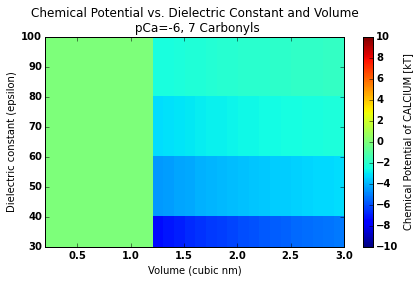

In [27]:
     
font = {'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)
pcolormesh(np.asarray(V_is),np.asarray(eps_filters),mymufilters.T,vmin=-10,vmax=10)

plt.colorbar(label = "Chemical Potential of CALCIUM [kT]")
plt.title("Chemical Potential vs. Dielectric Constant and Volume \n pCa=-6, 7 Carbonyls")
plt.xlabel("Volume (cubic nm)")
plt.ylabel("Dielectric constant (epsilon)")
plt.xlim(0.2,3.0)
plt.tight_layout()
#plt.gcf().savefig("/net/share/shared/papers/150611_MSA_AS/testMSA2D_7carbonyls_CA.png", dpi = 300)
#plt.gcf().savefig("EPS_and_Vs_against_mus_pCaminus7_MG.png", dpi = 300)

In [17]:
print mymufilters

[[-1.77263076 -1.77285043 -2.29103642 -2.2913926  -3.18429528 -3.18497194
  -5.12102231 -5.12279376]
 [-1.7955331  -1.79575593 -2.32236348 -2.32272513 -3.23085226 -3.23153958
  -5.20011547 -5.20191541]
 [-1.81936439 -1.81959071 -2.35527119 -2.35563862 -3.27981043 -3.28050898
  -5.28305696 -5.28488683]
 [-1.84438608 -1.84461609 -2.38989409 -2.39026762 -3.33136818 -3.3320786
  -5.3701258  -5.37198714]
 [-1.87070095 -1.87093487 -2.42638222 -2.42676219 -3.38574547 -3.38646844
  -5.46162858 -5.46352306]
 [-1.89842407 -1.89866214 -2.46490322 -2.46529004 -3.44318658 -3.44392285
  -5.55790335 -5.55983278]
 [-1.92768445 -1.92792691 -2.50564474 -2.50603884 -3.50396326 -3.50471364
  -5.65932419 -5.66129052]
 [-1.95862676 -1.95887393 -2.5488175  -2.54921934 -3.56837863 -3.56914402
  -5.76630645 -5.7683118 ]
 [-1.9914138  -1.99166598 -2.59465782 -2.59506793 -3.63677106 -3.63755246
  -5.87931356 -5.88136028]
 [-2.02622849 -2.02648604 -2.64343184 -2.64385081 -3.70951941 -3.71031792
  -5.99886467 -6.0

In [60]:
print CD_rhos


[[  1.06035889e+01   2.53804476e-03   3.67622687e-02   7.68480502e-07
    4.66603314e+00]
 [  1.06035889e+01   2.53804903e-03   3.67622358e-02   7.68479291e-06
    4.66602591e+00]
 [  1.06035889e+01   2.53806879e-03   3.67618557e-02   7.68466773e-05
    4.66595371e+00]
 [  1.06035889e+01   2.53824415e-03   3.67580036e-02   7.68341145e-04
    4.66523156e+00]
 [  1.06035889e+01   2.53997784e-03   3.67195075e-02   7.67087254e-03
    4.65802537e+00]
 [  1.06035889e+01   2.52330994e-03   3.62914663e-02   7.54245743e-02
    4.58730760e+00]
 [  1.06035889e+01   2.42796265e-03   3.27031658e-02   6.47428656e-01
    3.99029309e+00]
 [  1.06035889e+01   2.48667302e-03   1.88298800e-02   2.74516047e+00
    1.80150314e+00]
 [  1.06035889e+01   5.50411600e-03   6.28113220e-03   4.18311374e+00
    3.04689014e-01]
 [  1.06035889e+01   2.43546107e-02   1.99722115e-03   4.45196851e+00
    3.67934391e-02]]


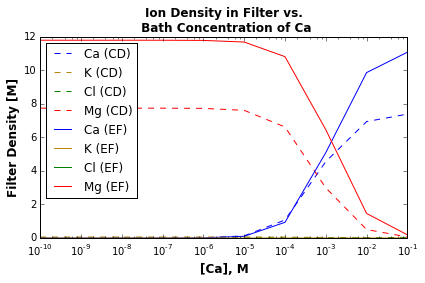

In [42]:
CD_rhos = np.loadtxt("/net/share/shared/papers/150611_MSA_AS/MSA/MSA_CD_rhos.txt")
EF_rhos = np.loadtxt("/net/share/shared/papers/150611_MSA_AS/MSA/MSA_EF_rhos.txt")

idxO=0
idxCl=1
idxNa=2
idxCa=3
idxMg=4
font = {'weight' : 'bold','size'   : 12}

plt.plot(cacl2s,CD_rhos[:,idxCa]*1.6606,'b--',label="Ca (CD)")
plt.plot(cacl2s,CD_rhos[:,idxNa]*1.6606,'--',color='darkgoldenrod', label="K (CD)")
plt.plot(cacl2s,CD_rhos[:,idxCl]*1.6606,'g--',label="Cl (CD)")
plt.plot(cacl2s,CD_rhos[:,idxMg]*1.6606,'r--',label="Mg (CD)")
plt.plot(cacl2s,EF_rhos[:,idxCa]*1.6606,'b-',label="Ca (EF)")
plt.plot(cacl2s,EF_rhos[:,idxNa]*1.6606,'-',color='darkgoldenrod',label="K (EF)")
plt.plot(cacl2s,EF_rhos[:,idxCl]*1.6606,'g-',label="Cl (EF)")
plt.plot(cacl2s,EF_rhos[:,idxMg]*1.6606,'r-',label="Mg (EF)")
plt.title("Ion Density in Filter vs.\n Bath Concentration of Ca", **font)
plt.ylabel("Filter Density [M]", **font)
plt.xlabel("[Ca], M", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
plt.gcf().savefig("/net/share/shared/papers/150611_MSA_AS/MSA/CD_EF_rhos.png", dpi=300)

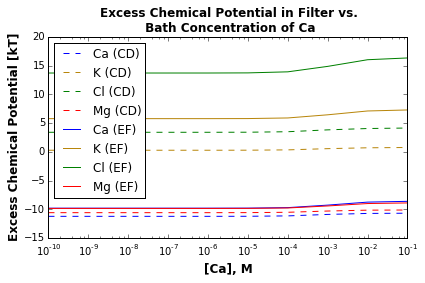

In [9]:
cacl2s = 10**np.linspace(-10,-1,10)
CD_mus = np.loadtxt("/net/share/shared/papers/150611_MSA_AS/MSA/MSA_CD_mus.txt")
EF_mus = np.loadtxt("/net/share/shared/papers/150611_MSA_AS/MSA/MSA_EF_mus.txt")
idxO=0
idxCl=1
idxNa=2
idxCa=3
idxMg=4

font = {'weight' : 'bold','size'   : 12}

plt.plot(cacl2s,CD_mus[:,idxCa],'b--',label="Ca (CD)")
plt.plot(cacl2s,CD_mus[:,idxNa],'--',color='darkgoldenrod',label="K (CD)")
plt.plot(cacl2s,CD_mus[:,idxCl],'g--',label="Cl (CD)")
plt.plot(cacl2s,CD_mus[:,idxMg],'r--',label="Mg (CD)")
plt.plot(cacl2s,EF_mus[:,idxCa],'b-',label="Ca (EF)")
plt.plot(cacl2s,EF_mus[:,idxNa],'-',color='darkgoldenrod',label="K (EF)")
plt.plot(cacl2s,EF_mus[:,idxCl],'g-',label="Cl (EF)")
plt.plot(cacl2s,EF_mus[:,idxMg],'r-',label="Mg (EF)")
plt.title("Excess Chemical Potential in Filter vs.\n Bath Concentration of Ca", **font)
plt.ylabel("Excess Chemical Potential [kT]", **font)
plt.xlabel("[Ca], M", **font)
plt.xscale("log", **font)
plt.legend(loc=2)
plt.tight_layout()
plt.gcf().savefig("/net/share/shared/papers/150611_MSA_AS/MSA/CD_EF_mus.png", dpi=300)

In [44]:
#CD site
rho_MG_adj_CD = CD_rhos[:,idxMg]*1.6606*np.exp(-12.034) / (CD_rhos[:,idxMg]*1.6606*np.exp(-12.034)+CD_rhos[:,idxCa]*1.6606*np.exp(-1.864))
rho_CA_adj_CD = CD_rhos[:,idxCa]*1.6606*np.exp(-1.864) / (CD_rhos[:,idxMg]*1.6606*np.exp(-12.034)+CD_rhos[:,idxCa]*1.6606*np.exp(-1.864))
mu_MG_adj_CD = CD_mus[:,idxMg] + 12.034
mu_CA_adj_CD = CD_mus[:,idxCa] + 1.864

#EF site
rho_MG_adj_EF = EF_rhos[:,idxMg]*1.6606*np.exp(-14.407) / (EF_rhos[:,idxMg]*1.6606*np.exp(-14.407)+EF_rhos[:,idxCa]*1.6606*np.exp(-2.881))
rho_CA_adj_EF = EF_rhos[:,idxCa]*1.6606*np.exp(-2.881) / (EF_rhos[:,idxMg]*1.6606*np.exp(-14.407)+EF_rhos[:,idxCa]*1.6606*np.exp(-2.881))
mu_MG_adj_EF = EF_mus[:,idxMg] + 14.407
mu_CA_adj_EF = EF_mus[:,idxCa] + 2.881



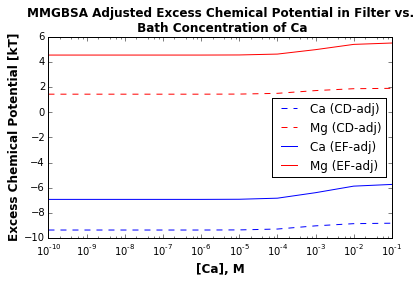

In [45]:
plt.plot(cacl2s,mu_CA_adj_CD,'b--',label="Ca (CD-adj)")
plt.plot(cacl2s,mu_MG_adj_CD,'r--',label="Mg (CD-adj)")
plt.plot(cacl2s,mu_CA_adj_EF,'b-',label="Ca (EF-adj)")
plt.plot(cacl2s,mu_MG_adj_EF,'r-',label="Mg (EF-adj)")
plt.title("MMGBSA Adjusted Excess Chemical Potential in Filter vs.\n Bath Concentration of Ca", **font)
plt.ylabel("Excess Chemical Potential [kT]", **font)
plt.xlabel("[Ca], M", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
plt.gcf().savefig("/net/share/shared/papers/150611_MSA_AS/MSA/CD_EF_adjmus.png", dpi=300)

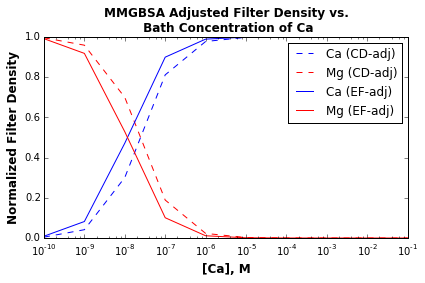

In [46]:
plt.plot(cacl2s,rho_CA_adj_CD,'b--',label="Ca (CD-adj)")
plt.plot(cacl2s,rho_MG_adj_CD,'r--',label="Mg (CD-adj)")
plt.plot(cacl2s,rho_CA_adj_EF,'b-',label="Ca (EF-adj)")
plt.plot(cacl2s,rho_MG_adj_EF,'r-',label="Mg (EF-adj)")
plt.title("MMGBSA Adjusted Filter Density vs.\n Bath Concentration of Ca", **font)
plt.ylabel("Normalized Filter Density", **font)
plt.xlabel("[Ca], M", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
plt.gcf().savefig("/net/share/shared/papers/150611_MSA_AS/MSA/CD_EF_adjrhos.png", dpi=300)

In [63]:
CD_HSs = np.loadtxt("MSA_CD_HS.txt")
EF_HSs = np.loadtxt("MSA_EF_HS.txt")


[ 3.06544106  3.0654414   3.06544476  3.06547835  3.06580928  3.06906599
  3.09668163  3.19995064  3.27468766  3.30586647]
10


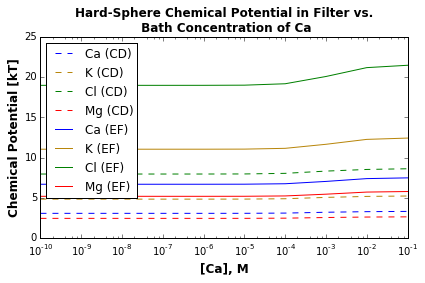

In [71]:

idxO=0
idxCl=1
idxNa=2
idxCa=3
idxMg=4
plt.plot(cacl2s,CD_HSs[:,idxCa],'b--',label="Ca (CD)")
plt.plot(cacl2s,CD_HSs[:,idxNa],'--',color='darkgoldenrod',label="K (CD)")
plt.plot(cacl2s,CD_HSs[:,idxCl],'g--',label="Cl (CD)")
plt.plot(cacl2s,CD_HSs[:,idxMg],'r--',label="Mg (CD)")
plt.plot(cacl2s,EF_HSs[:,idxCa],'b-',label="Ca (EF)")
plt.plot(cacl2s,EF_HSs[:,idxNa],'-',color='darkgoldenrod',label="K (EF)")
plt.plot(cacl2s,EF_HSs[:,idxCl],'g-',label="Cl (EF)")
plt.plot(cacl2s,EF_HSs[:,idxMg],'r-',label="Mg (EF)")
plt.title("Hard-Sphere Chemical Potential in Filter vs.\n Bath Concentration of Ca", **font)
plt.ylabel("Chemical Potential [kT]", **font)
plt.xlabel("[Ca], M", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
plt.gcf().savefig("/net/share/shared/papers/150611_MSA_AS/MSA/CD_EF_HSs.png", dpi=300)

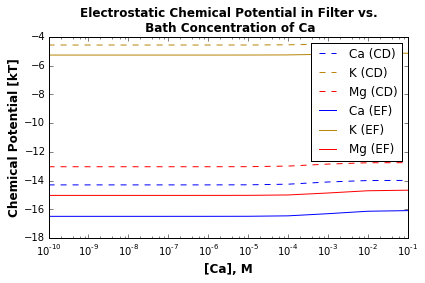

In [75]:
CD_ESs = np.loadtxt("MSA_CD_ES.txt")
EF_ESs = np.loadtxt("MSA_EF_ES.txt")
plt.plot(cacl2s,CD_ESs[:,idxCa],'b--',label="Ca (CD)")
plt.plot(cacl2s,CD_ESs[:,idxNa],'--',color='darkgoldenrod',label="K (CD)")
#plt.plot(cacl2s,CD_ESs[:,idxCl],'g--',label="Cl (CD)")
plt.plot(cacl2s,CD_ESs[:,idxMg],'r--',label="Mg (CD)")
plt.plot(cacl2s,EF_ESs[:,idxCa],'b-',label="Ca (EF)")
plt.plot(cacl2s,EF_ESs[:,idxNa],'-',color='darkgoldenrod',label="K (EF)")
#plt.plot(cacl2s,EF_ESs[:,idxCl],'g-',label="Cl (EF)")
plt.plot(cacl2s,EF_ESs[:,idxMg],'r-',label="Mg (EF)")
plt.title("Electrostatic Chemical Potential in Filter vs.\n Bath Concentration of Ca", **font)
plt.ylabel("Chemical Potential [kT]", **font)
plt.xlabel("[Ca], M", **font)
plt.xscale("log", **font)
plt.legend(loc="best")
plt.tight_layout()
#plt.gcf().savefig("/net/share/shared/papers/150611_MSA_AS/MSA/CD_EF_ESs.png", dpi=300)